# Mobile Price Classification

https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=test.csv

# Libraries Importing

In [2]:
%%capture
!pip install category-encoders

# Standard Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_palette('Set2')
import warnings
warnings.filterwarnings("ignore")
 



# Data loading

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/helah20/Dataset/main/train.csv')
dft=pd.read_csv('https://raw.githubusercontent.com/helah20/Dataset/main/test.csv')


# Look at data..

In [ ]:
df.sample(5)

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
172             625     1          1.2  ...             1     1            2
493            1902     0          2.8  ...             1     0            0
1526            963     0          0.5  ...             0     0            2
661            1897     0          3.0  ...             1     1            0
1085           1741     1          0.5  ...             1     1            2

[5 rows x 21 columns]

In [ ]:
dft.sample(5)

id  battery_power  blue  ...  three_g  touch_screen  wifi
123  124           1806     0  ...        1             1     1
171  172           1765     0  ...        1             0     1
306  307            996     0  ...        1             1     1
620  621            657     0  ...        0             0     1
316  317           1095     1  ...        0             0     1

[5 rows x 21 columns]

In [ ]:
print(df.shape, '\n', dft.shape)

(2000, 21) 
 (1000, 21)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
col=df.columns
col

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.battery_power.value_counts()

1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_power, Length: 1094, dtype: int64

In [ ]:
df.blue.value_counts().unique()

array([1010,  990])

In [ ]:
df.clock_speed.value_counts()

0.5    413
2.8     85
2.3     78
1.6     76
2.1     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.8     58
2.4     58
0.9     58
1.2     56
2.7     55
2.6     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

In [ ]:
df.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [ ]:
df.fc.value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

In [ ]:
df.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [ ]:
df.int_memory.value_counts()

27    47
14    45
16    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

In [ ]:
df.m_dep.value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

In [ ]:
df.mobile_wt.value_counts()

182    28
185    27
101    27
146    26
199    26
       ..
176    10
96      9
120     9
149     9
140     9
Name: mobile_wt, Length: 121, dtype: int64

In [ ]:
df.n_cores.value_counts()

4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64

In [ ]:
df.pc.value_counts()

10    122
7     119
9     112
20    110
14    104
1     104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

In [ ]:
df.px_height.value_counts()

347     7
179     6
371     6
275     6
526     5
       ..
1057    1
1060    1
520     1
1063    1
1960    1
Name: px_height, Length: 1137, dtype: int64

In [ ]:
df.px_width.value_counts().unique()

array([7, 6, 5, 4, 3, 2, 1])

In [ ]:
df.ram.value_counts()

2610    4
2227    4
3142    4
1464    4
1229    4
       ..
1270    1
3321    1
1274    1
2479    1
763     1
Name: ram, Length: 1562, dtype: int64

In [ ]:
df.sc_h.value_counts().unique()

array([193, 157, 151, 143, 135, 131, 126, 125, 124, 120, 117, 114,  97])

In [ ]:
df.sc_w.value_counts().unique()

array([210, 199, 182, 180, 161, 156, 132, 130, 125, 107,  97,  84,  68,
        49,  33,  31,  29,  19,   8])

In [ ]:
df.talk_time.value_counts().unique()

array([124, 123, 116, 115, 113, 111, 105, 104, 103, 102, 101, 100,  99,
        98,  94,  93])

In [ ]:
df.three_g.value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [ ]:
df.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [ ]:
df.wifi.value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [ ]:
df.price_range.value_counts()
      

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

# EDA

## Exploring Data

In [ ]:
df.describe()

battery_power       blue  ...         wifi  price_range
count    2000.000000  2000.0000  ...  2000.000000  2000.000000
mean     1238.518500     0.4950  ...     0.507000     1.500000
std       439.418206     0.5001  ...     0.500076     1.118314
min       501.000000     0.0000  ...     0.000000     0.000000
25%       851.750000     0.0000  ...     0.000000     0.750000
50%      1226.000000     0.0000  ...     1.000000     1.500000
75%      1615.250000     1.0000  ...     1.000000     2.250000
max      1998.000000     1.0000  ...     1.000000     3.000000

[8 rows x 21 columns]

In [32]:
 df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

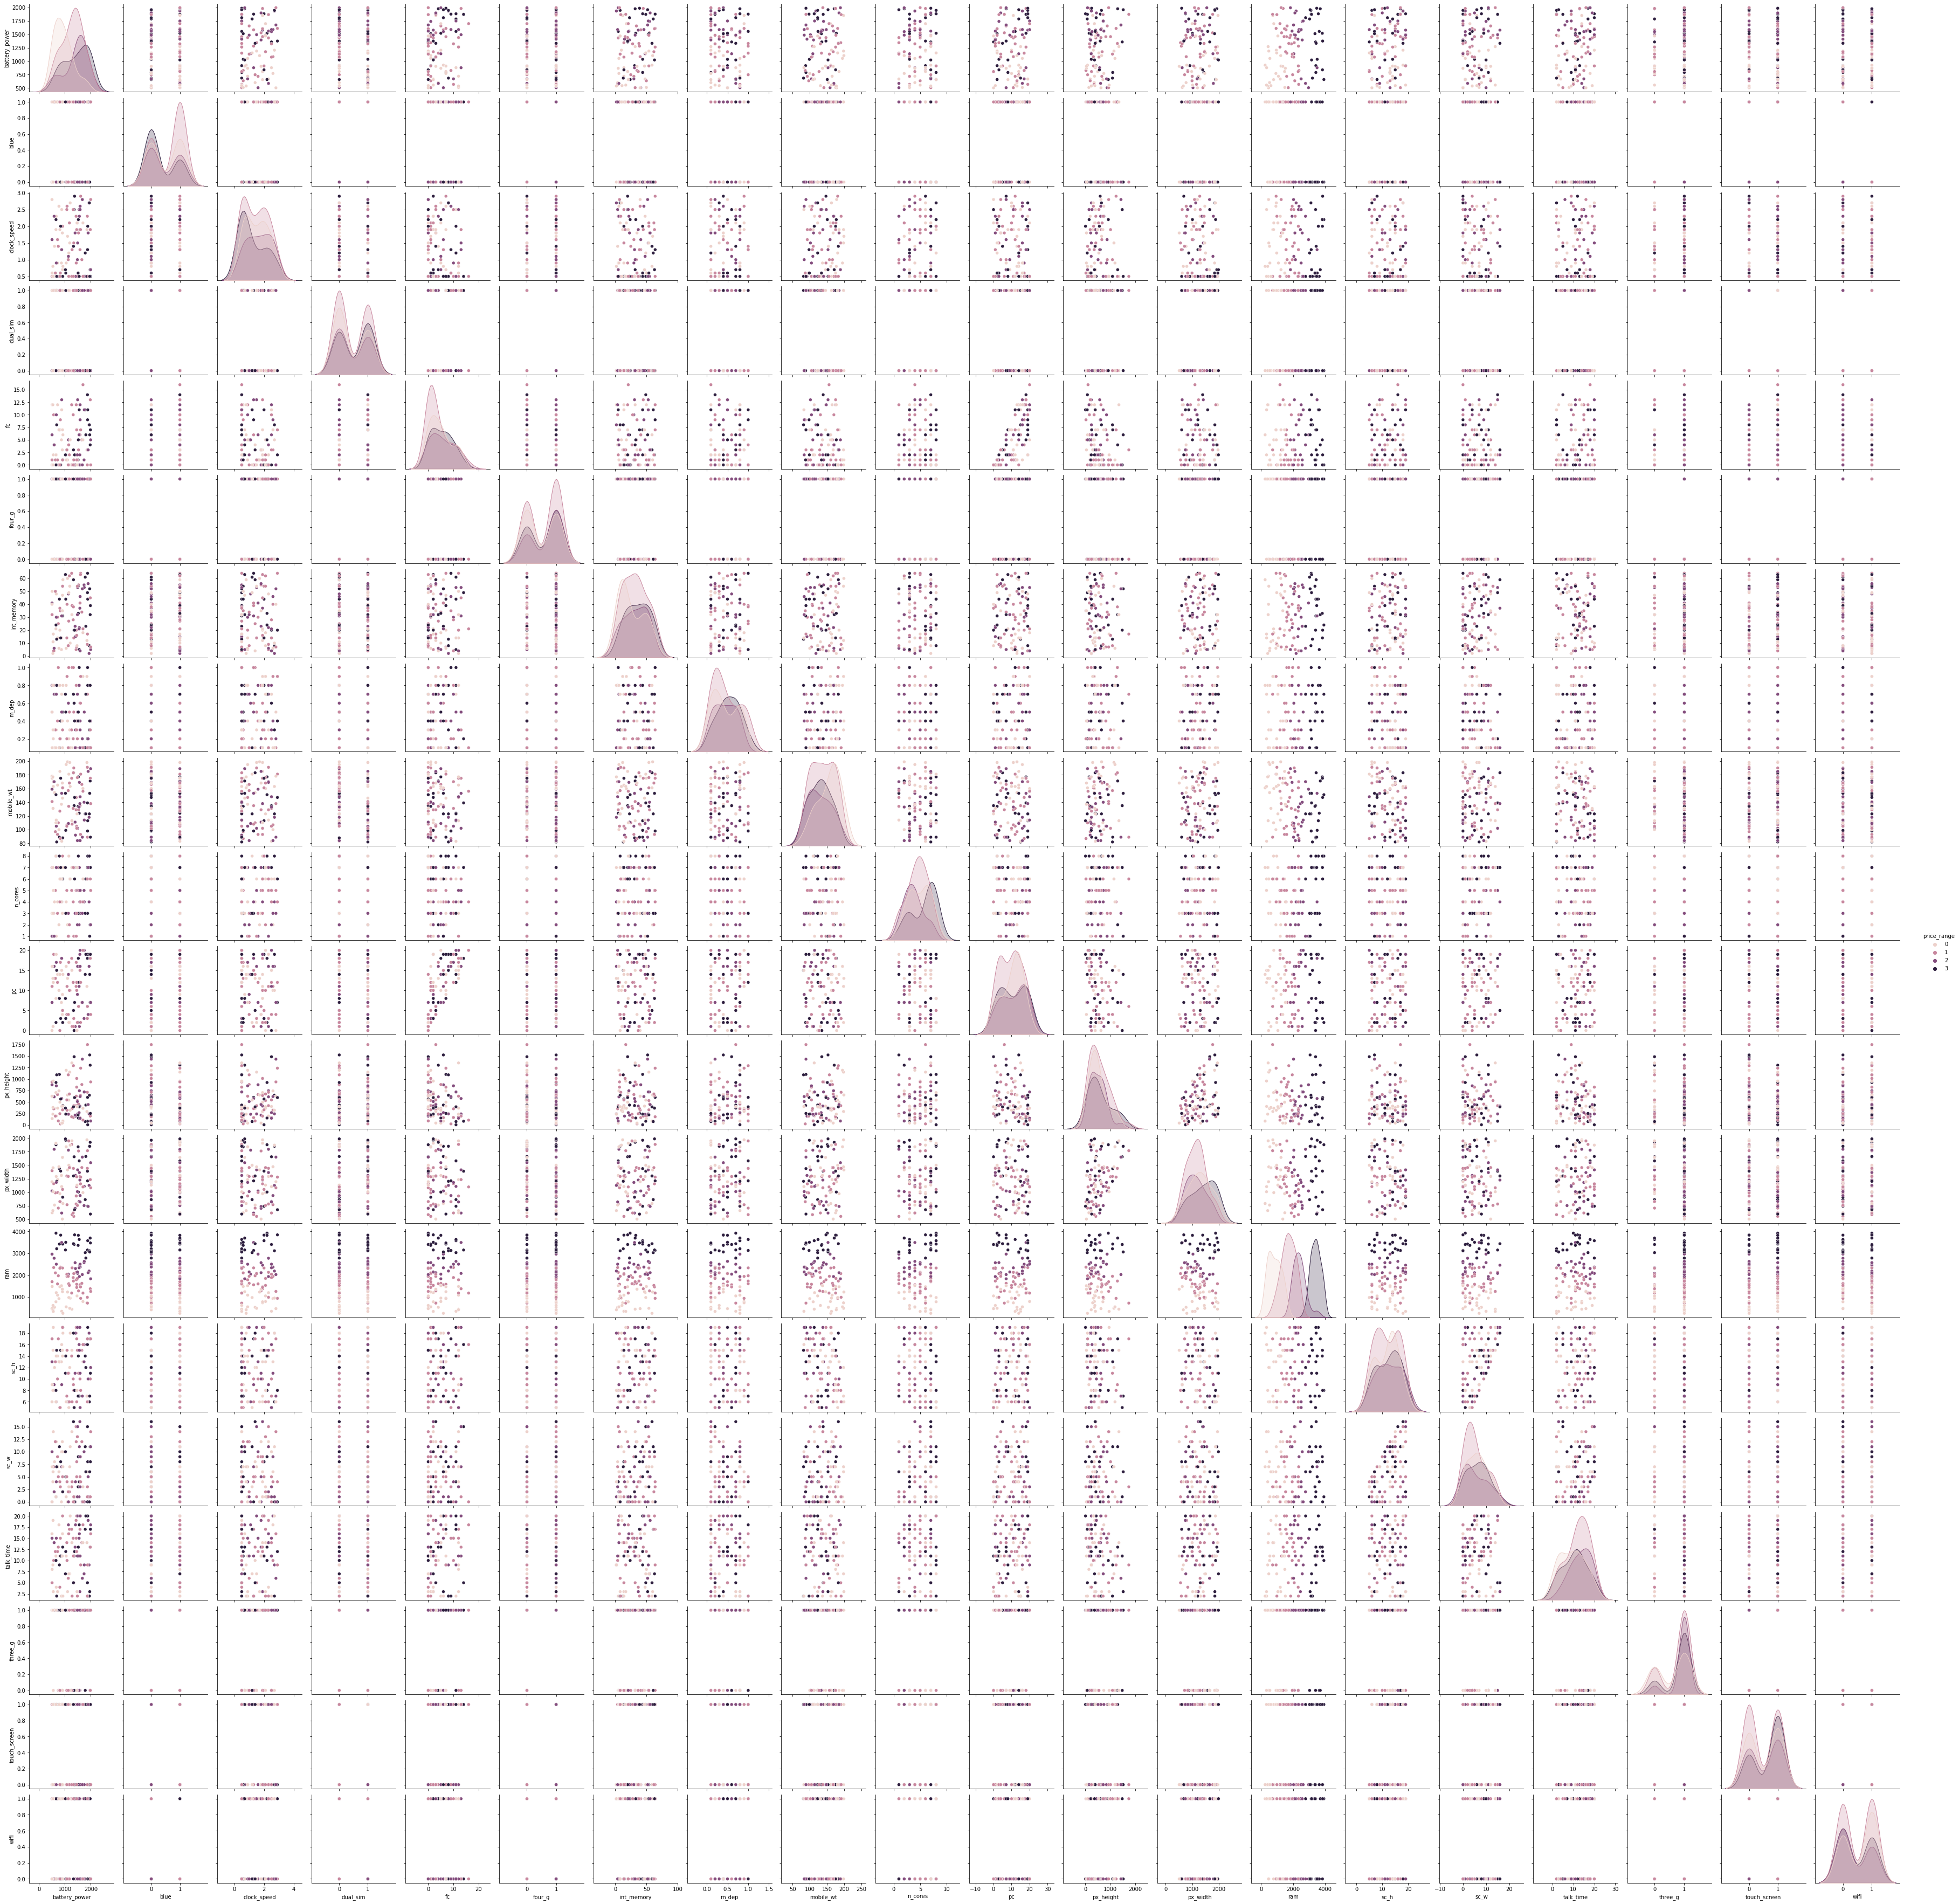

In [ ]:
sns.pairplot(data=df.sample(100) ,hue='price_range')

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

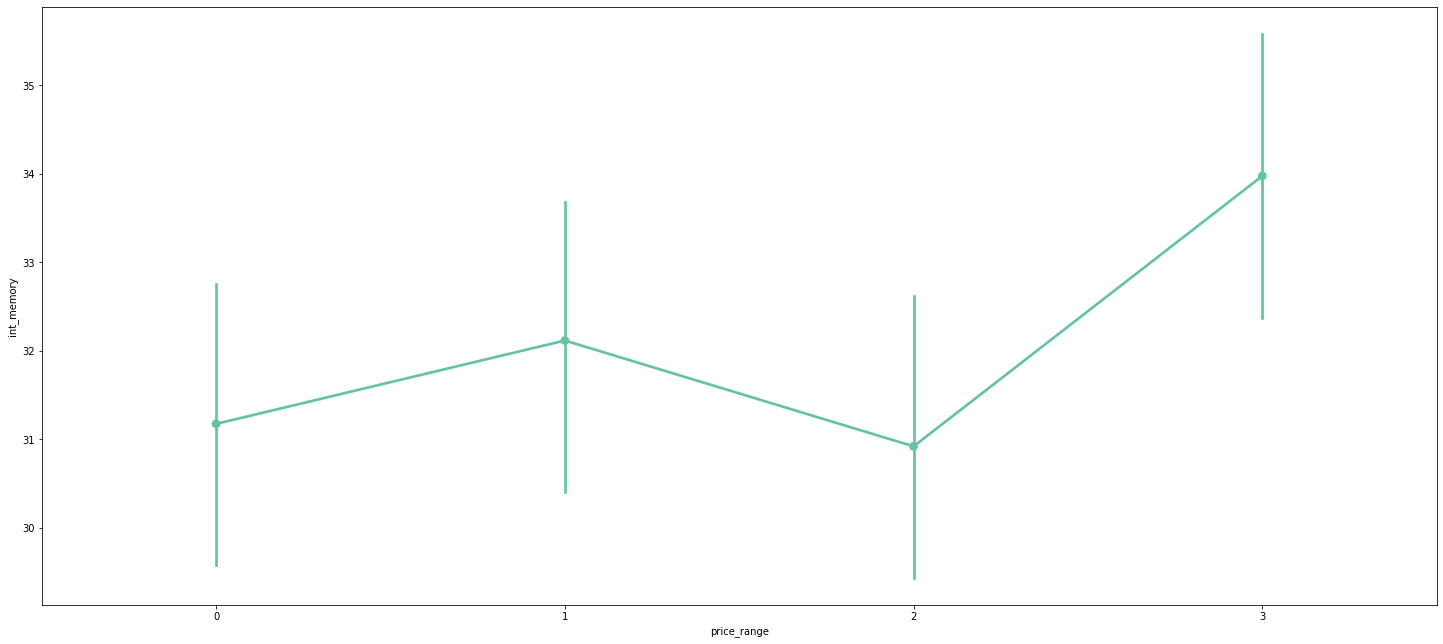

In [8]:
fig=plt.figure(figsize=(25,11))
sns.pointplot(y="int_memory", x="price_range", data=df)

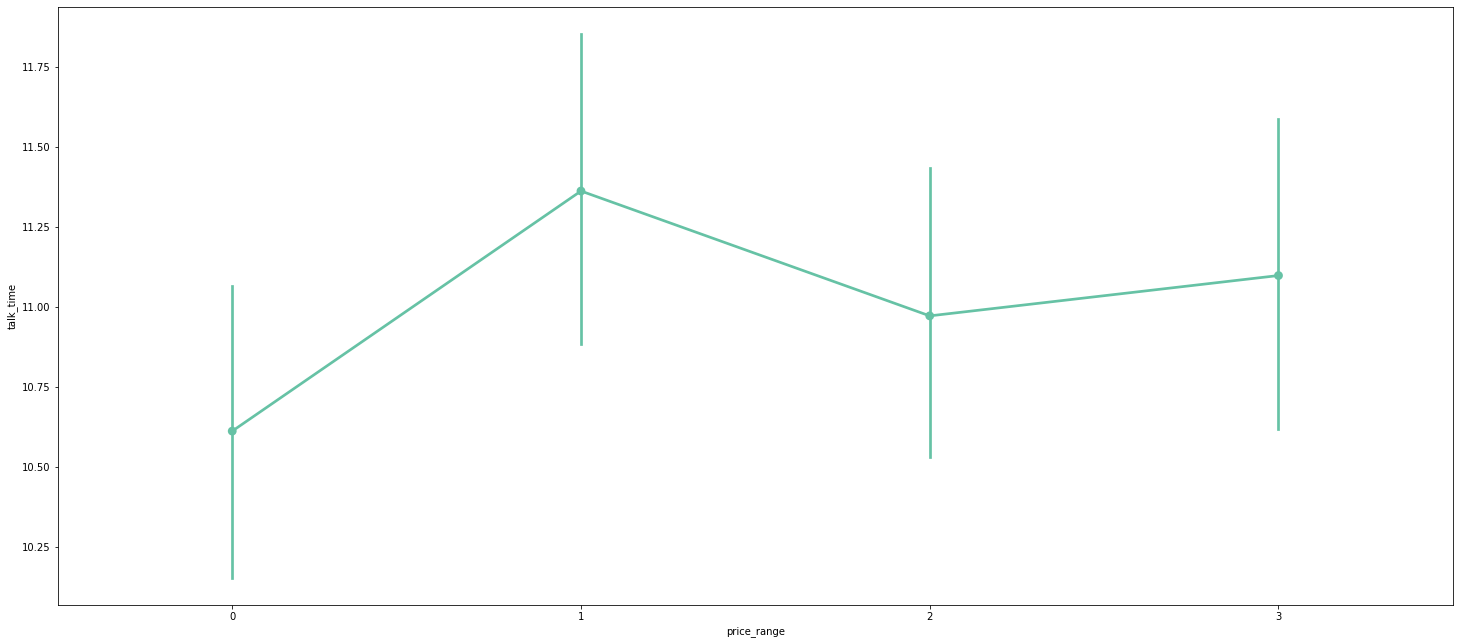

In [7]:
fig=plt.figure(figsize=(25,11))
sns.pointplot(y="talk_time", x="price_range", data=df)

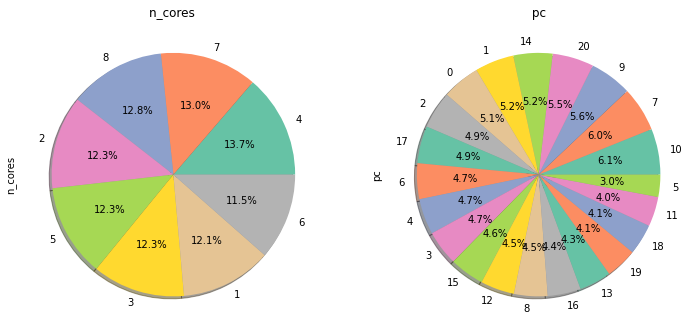

In [9]:
#pie chart 

f,ax=plt.subplots(1,2,figsize=(12,12))
df['n_cores'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
df['pc'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)




ax[0].set_title('n_cores ')
ax[1].set_title(' pc ')

plt.show()

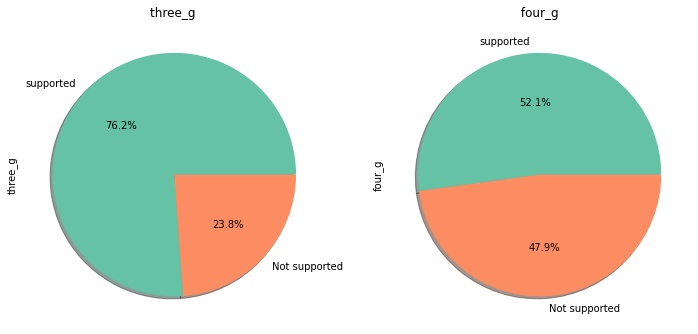

In [10]:
labels = ["supported",'Not supported']
f,ax=plt.subplots(1,2,figsize=(12,12))
df['three_g'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, labels=labels)
df['four_g'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True, labels=labels)




ax[0].set_title('three_g ')
ax[1].set_title(' four_g ')

plt.show()

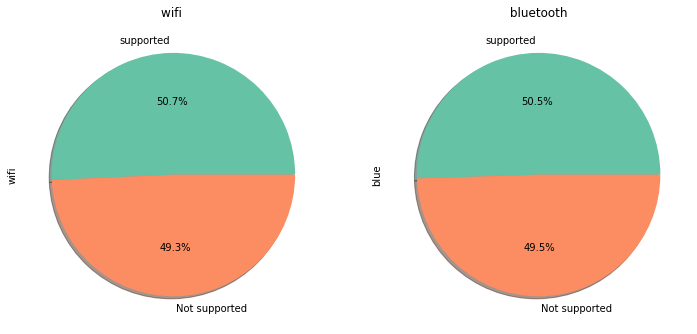

In [11]:
labels = ["supported",'Not supported']
f,ax=plt.subplots(1,2,figsize=(12,12))
df['wifi'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, labels=labels)
df['blue'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True, labels=labels)




ax[0].set_title('wifi ')
ax[1].set_title(' bluetooth ')

plt.show()

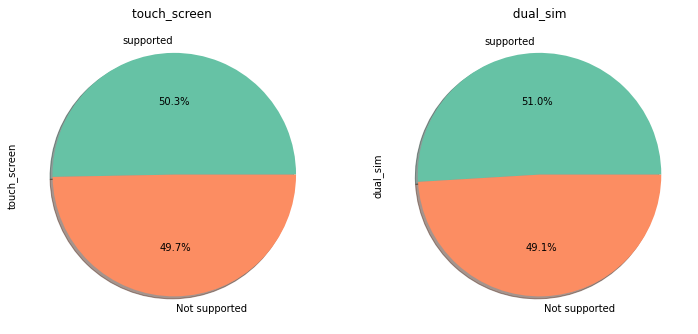

In [12]:
labels = ["supported",'Not supported']
f,ax=plt.subplots(1,2,figsize=(12,12))
df['touch_screen'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, labels=labels)
df['dual_sim'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True, labels=labels)




ax[0].set_title('touch_screen ')
ax[1].set_title(' dual_sim ')

plt.show()

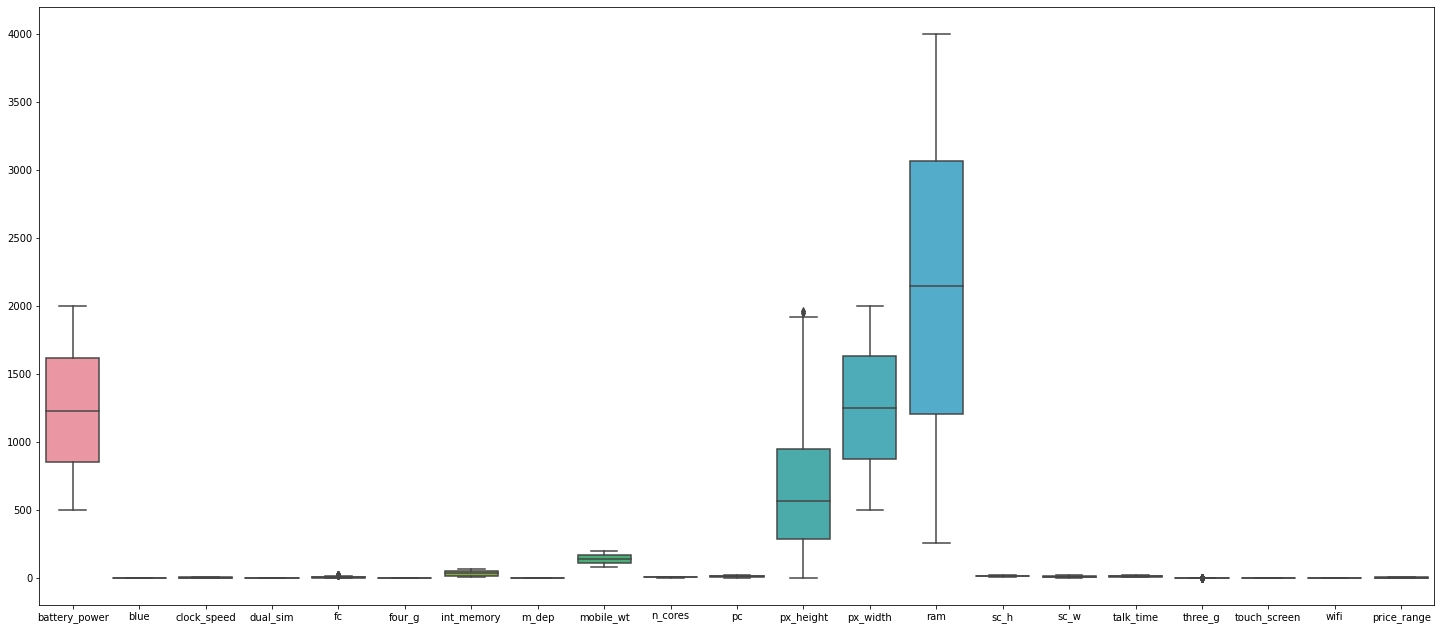

In [ ]:
fig=plt.figure(figsize=(25,11))
# col=['id','target']
sns.boxplot(data=df)
plt.show()

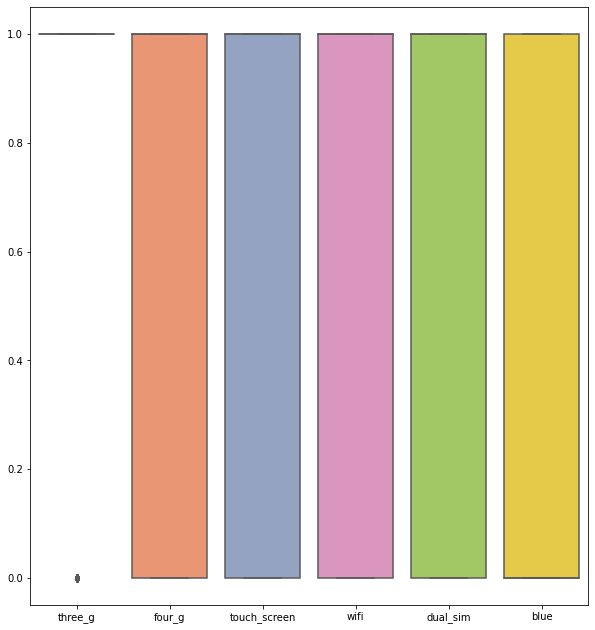

In [13]:
fig=plt.figure(figsize=(10,11)) #why 3g represent like this !!
sns.boxplot(data=df[['three_g', 'four_g','touch_screen', 'wifi' ,'dual_sim', 'blue']])
plt.show()

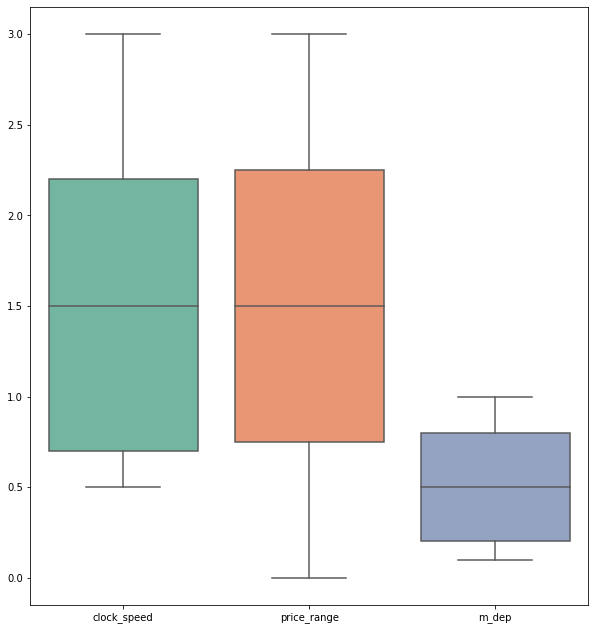

In [14]:
fig=plt.figure(figsize=(10,11))

sns.boxplot(data=df[[ 'clock_speed',  'price_range','m_dep']])
plt.show()

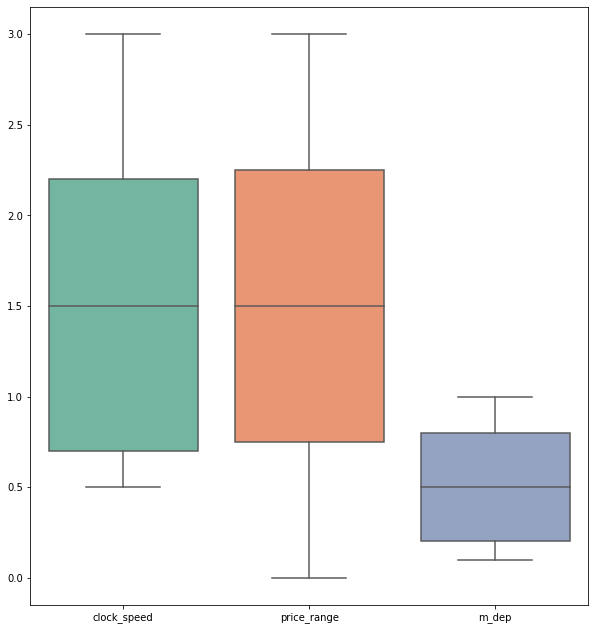

In [15]:
fig=plt.figure(figsize=(10,11))

sns.boxplot(data=df[[ 'clock_speed',  'price_range','m_dep']])
plt.show()

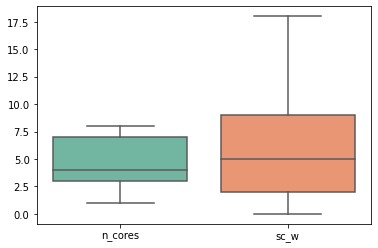

In [16]:
sns.boxplot(data=df[[   'n_cores' ,'sc_w']])
plt.show()

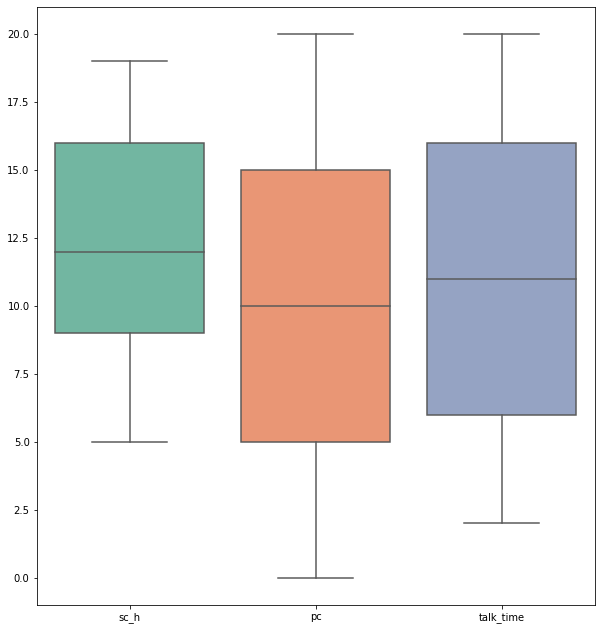

In [17]:
fig=plt.figure(figsize=(10,11))
sns.boxplot(data=df[['sc_h', 'pc', 'talk_time']])
plt.show()

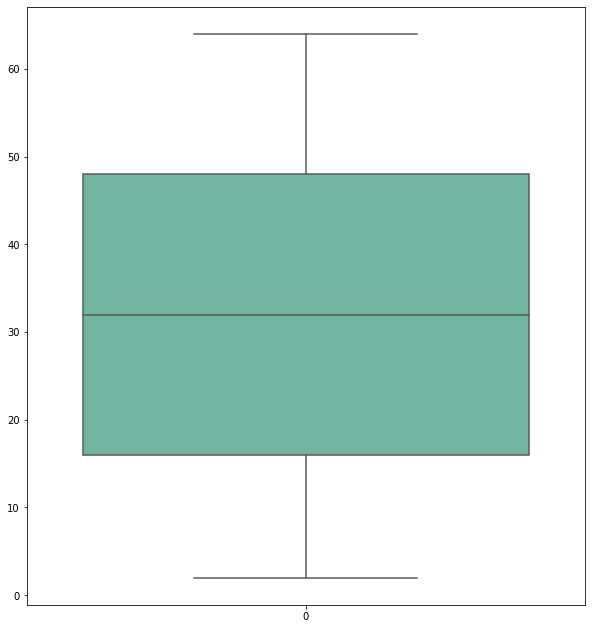

In [18]:
fig=plt.figure(figsize=(10,11))
sns.boxplot(data=df['int_memory'])
plt.show()

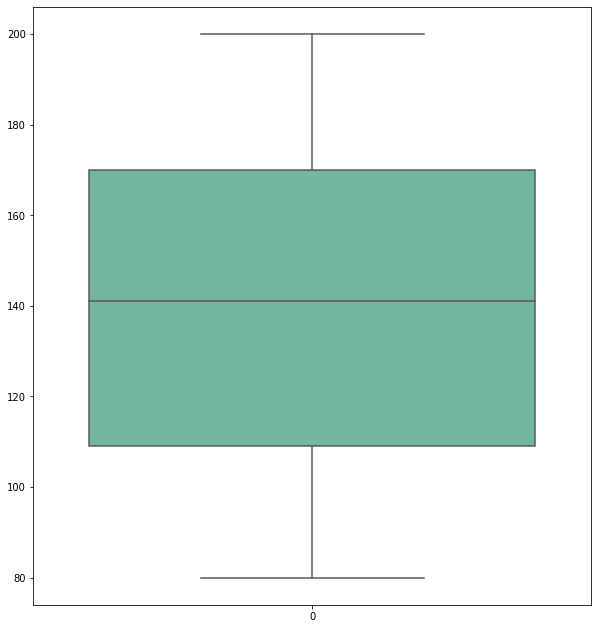

In [19]:
fig=plt.figure(figsize=(10,11))
sns.boxplot(data=df['mobile_wt'])
plt.show()

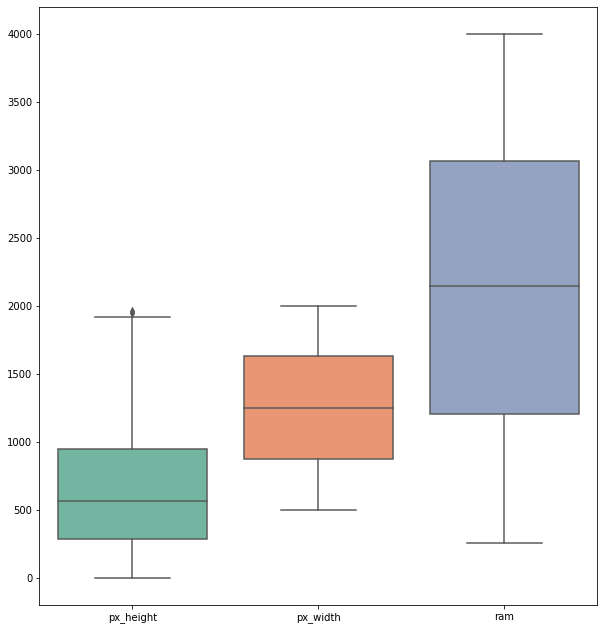

In [20]:
fig=plt.figure(figsize=(10,11))
sns.boxplot(data=df[[ 'px_height','px_width', 'ram']])
plt.show()

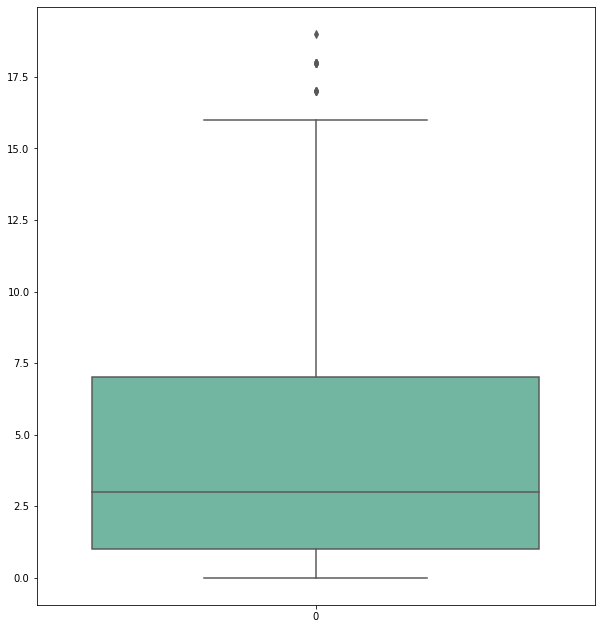

In [21]:
fig=plt.figure(figsize=(10,11)) # there is outlier in Front Camera mega pixels !!! 
sns.boxplot(data=df['fc'])
plt.show()

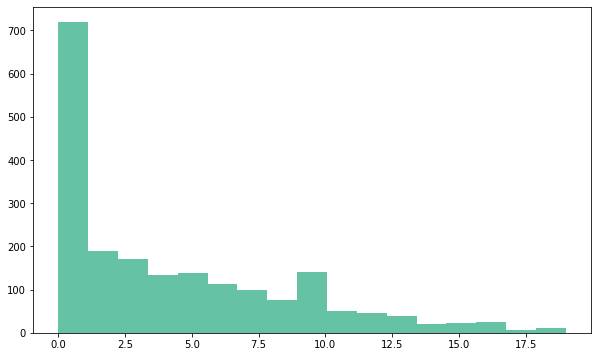

In [22]:
plt.figure(figsize=(10,6))
plt.hist( df.fc , bins=17, histtype='barstacked');

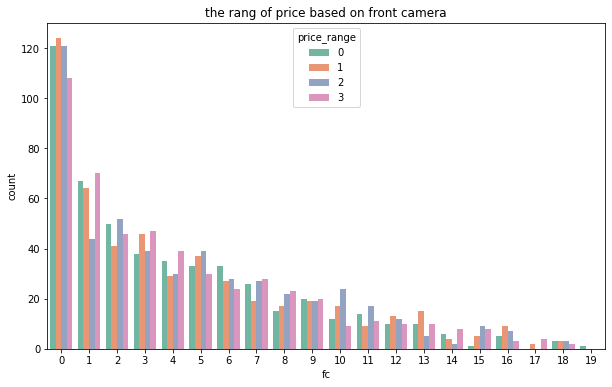

In [23]:
# df.fc.value_counts()
plt.figure(figsize=(10,6))

sns.countplot(x='fc', data=df, hue= 'price_range').set_title('the rang of price based on front camera',fontsize=12);

In [35]:
 list(df)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [33]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 2 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 2 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


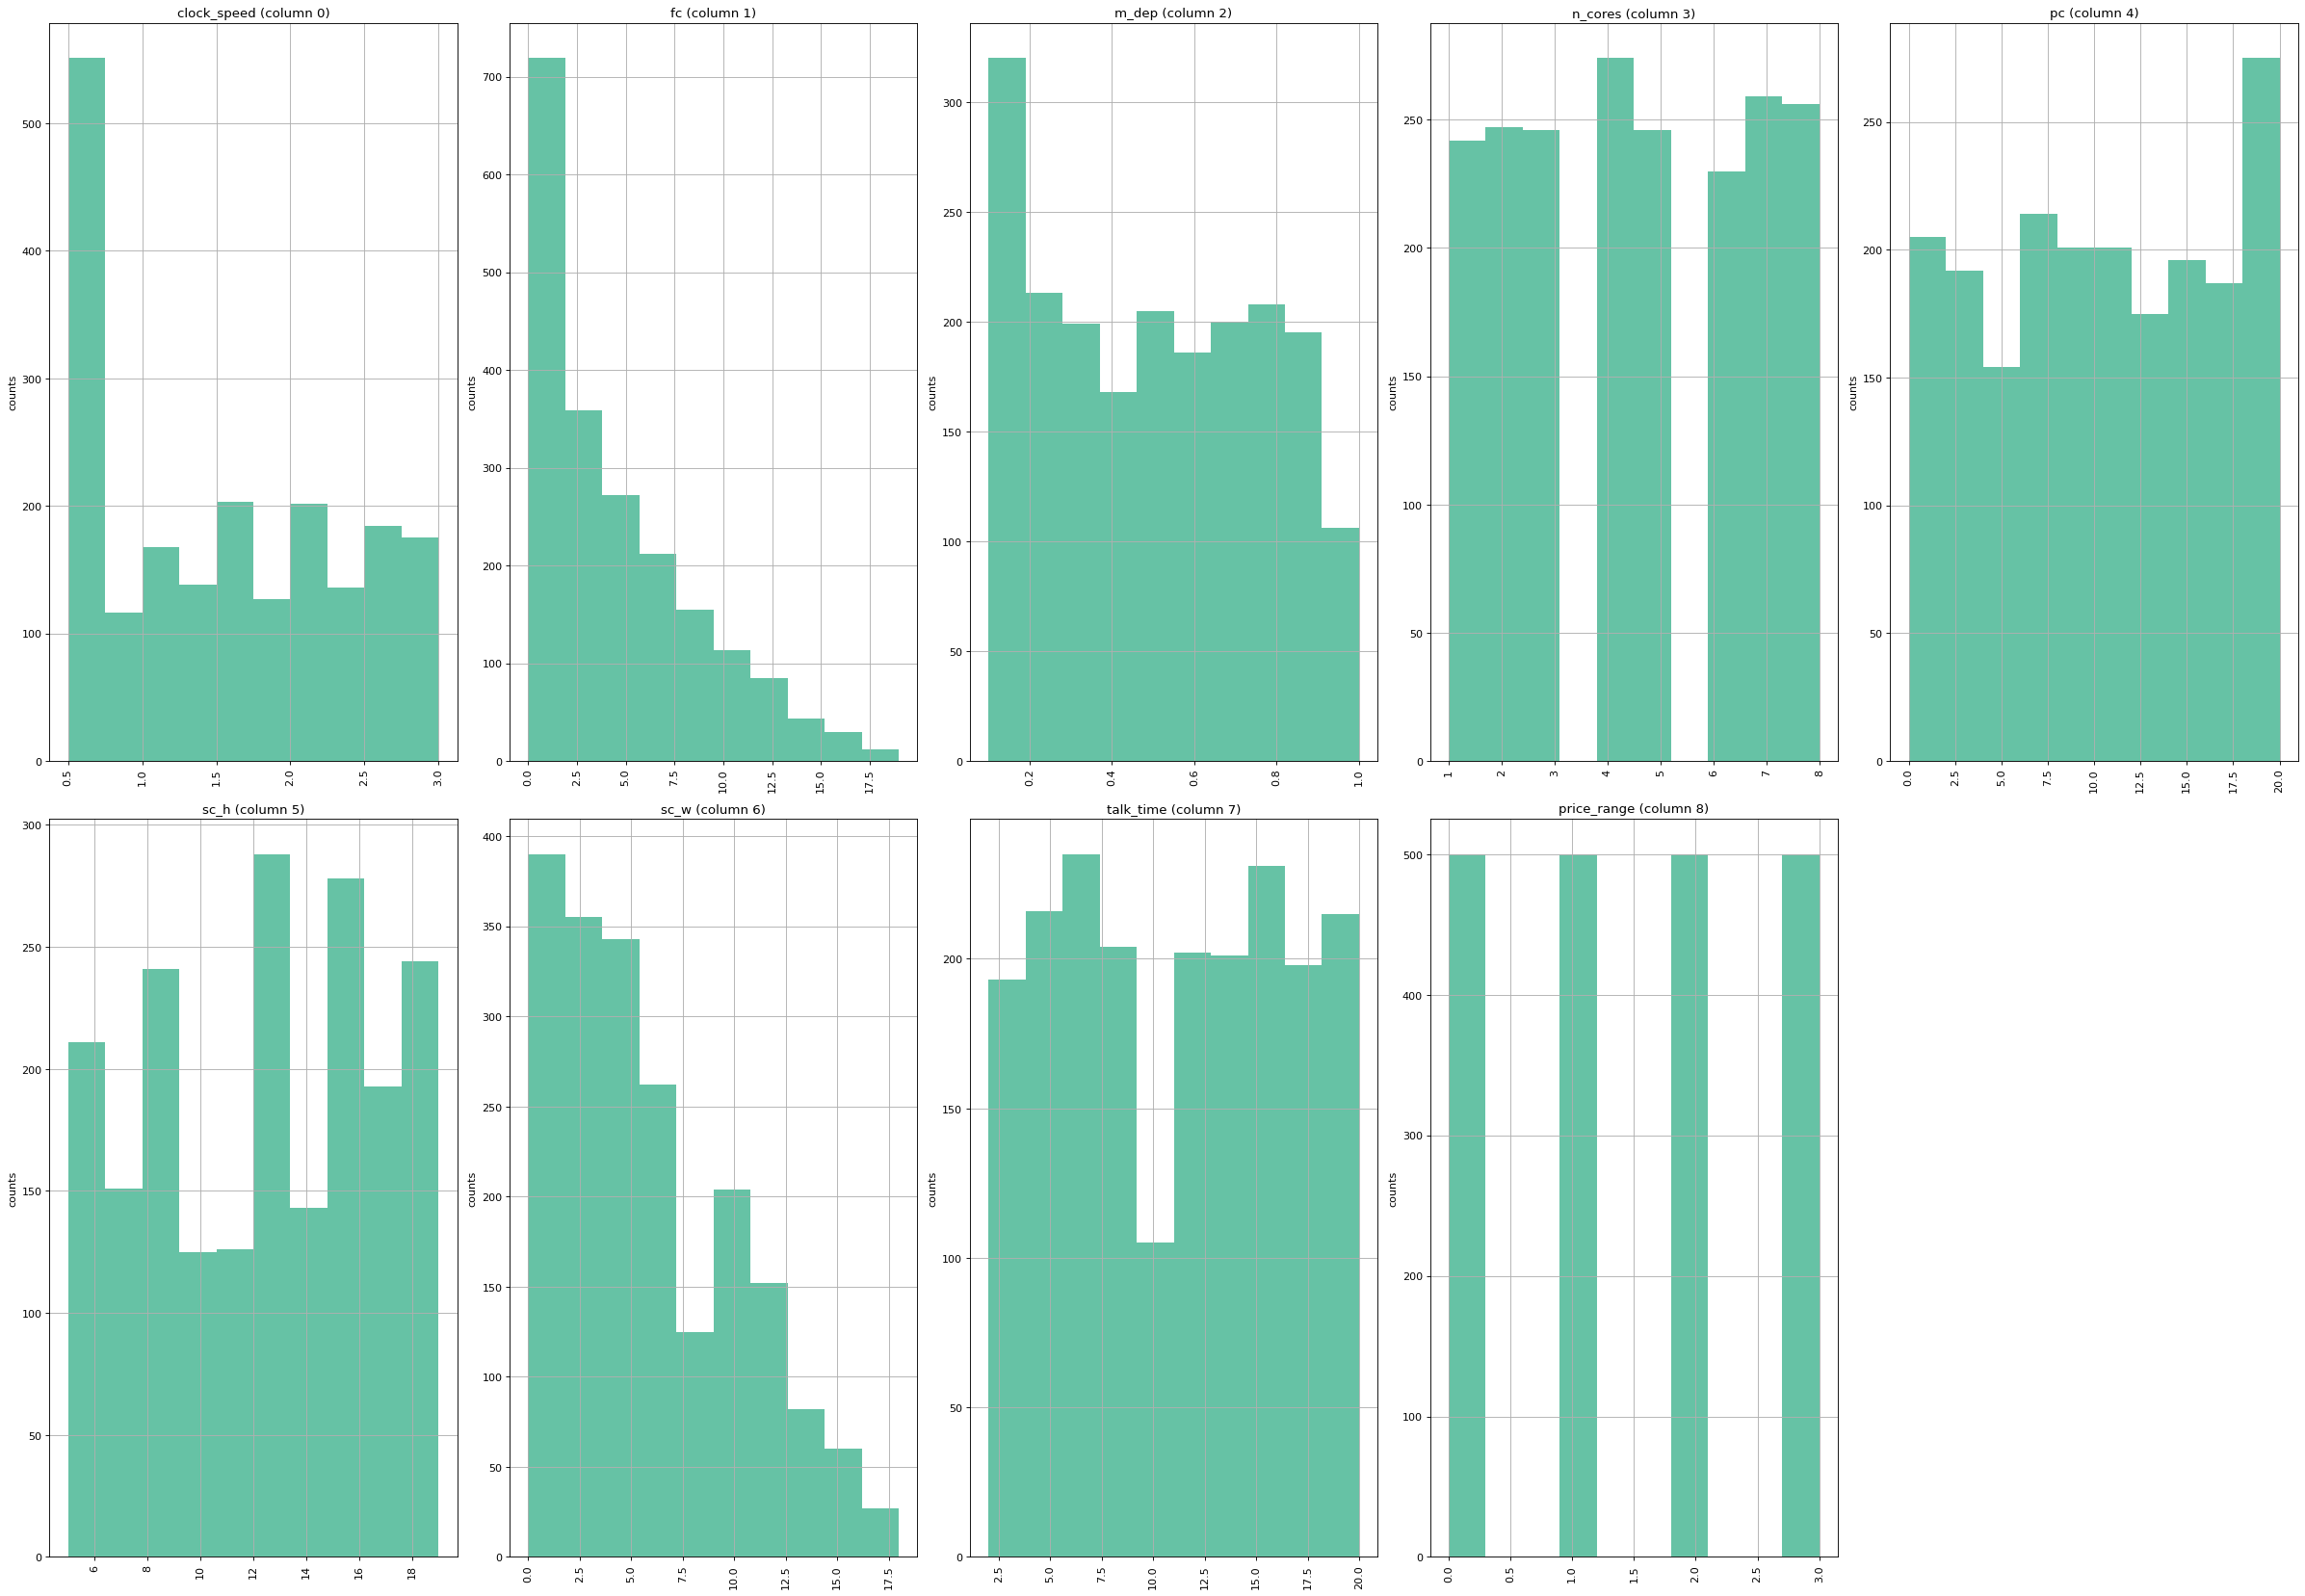

In [34]:
plotPerColumnDistribution(df, 15, 5)

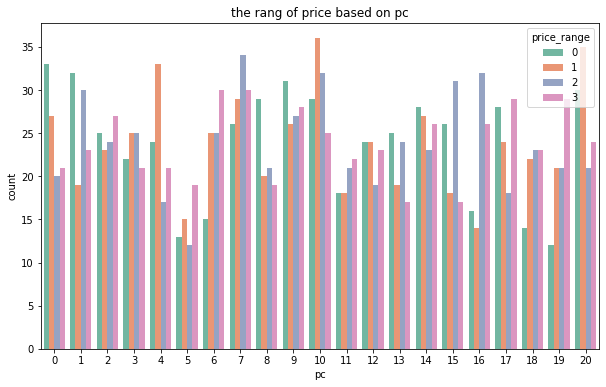

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='pc', data=df, hue= 'price_range').set_title('the rang of price based on pc',fontsize=12);

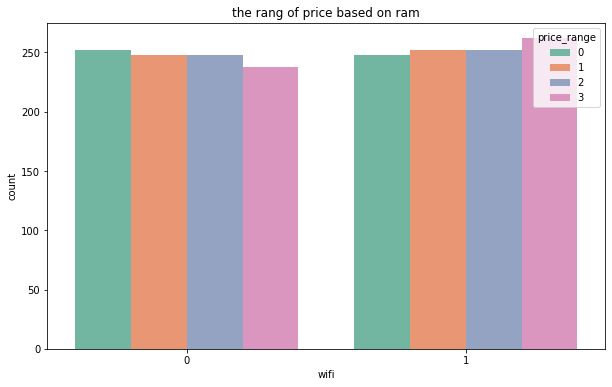

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='wifi', data=df, hue= 'price_range').set_title('the rang of price based on wifi Feature ',fontsize=12);

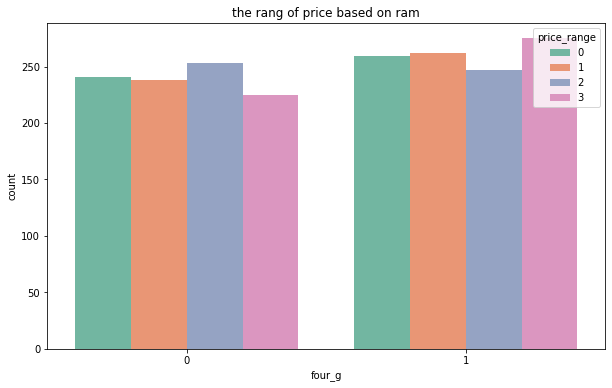

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='four_g', data=df, hue= 'price_range').set_title('the rang of price based on ram four_g Feature',fontsize=12 );

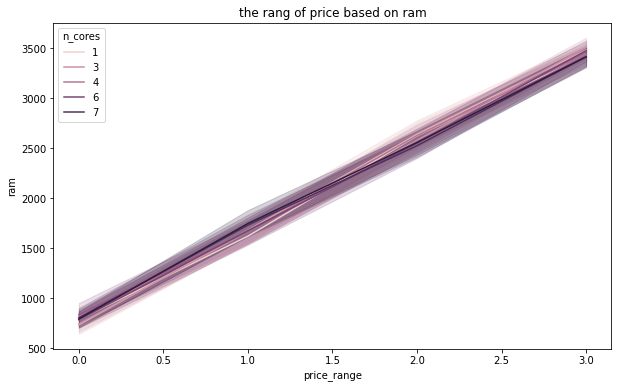

In [49]:
plt.figure(figsize=(10,6))

sns.lineplot(x='price_range', y='ram', data=df, hue='n_cores').set_title('the rang of price based on ram',fontsize=12);

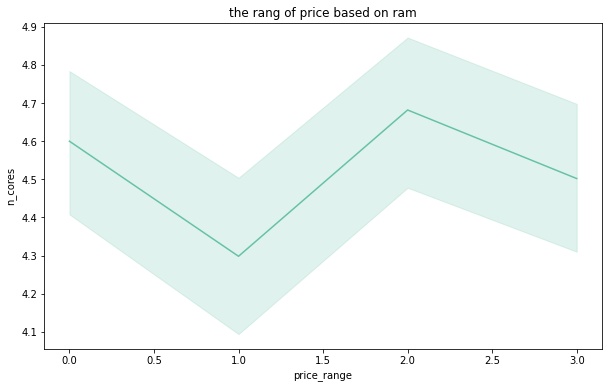

In [52]:
plt.figure(figsize=(10,6))

sns.lineplot(x='price_range', y='n_cores', data=df).set_title('the rang of price based on n_cores',fontsize=12);

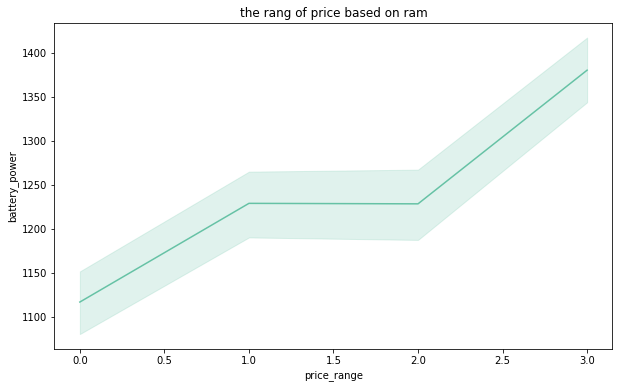

In [53]:
plt.figure(figsize=(10,6))

sns.lineplot(x='price_range', y='battery_power', data=df).set_title('the rang of price based on battery_power',fontsize=12);

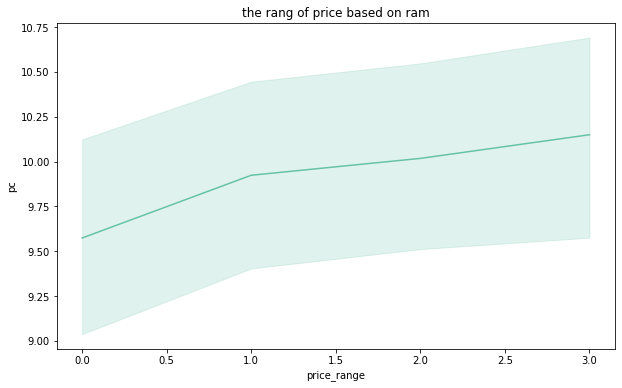

In [55]:
plt.figure(figsize=(10,6))

sns.lineplot(x='price_range', y='pc', data=df).set_title('the rang of price based on pc',fontsize=12);

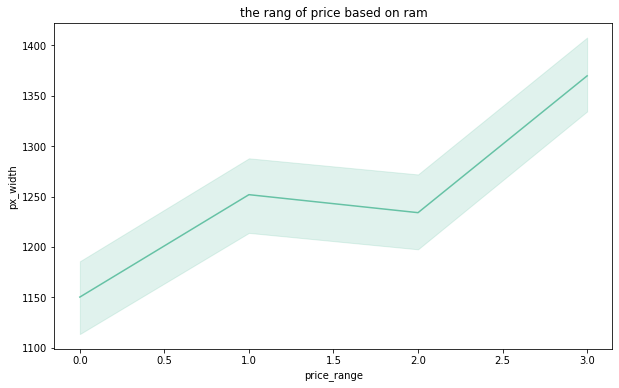

In [71]:
plt.figure(figsize=(10,6))

sns.lineplot(x='price_range', y='px_width', data=df).set_title('the rang of price based on px_width',fontsize=12);


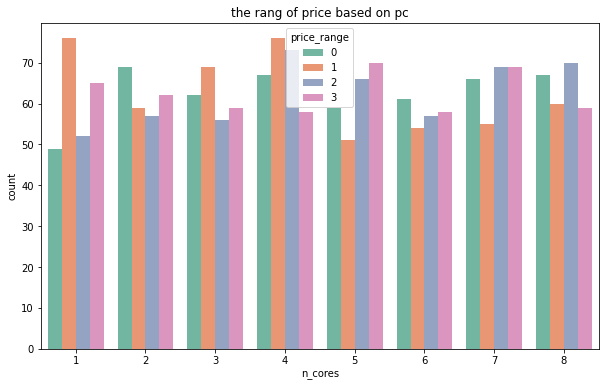

In [57]:
plt.figure(figsize=(10,6))

sns.countplot(x='n_cores', data=df, hue= 'price_range').set_title('the rang of price based on number of core',fontsize=12);